<a href="https://colab.research.google.com/github/themightyNJ/learningDeepLearning/blob/master/MPNeuron%26Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset

In [ ]:
import numpy as np
import sklearn.datasets

In [ ]:
breast_cancer = sklearn.datasets.load_breast_cancer()

In [ ]:
x = breast_cancer.data
y = breast_cancer.target

In [ ]:
print(x,y)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]] [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 

In [ ]:
print(x.shape, y.shape)

(569, 30) (569,)


In [ ]:
import pandas as pd

In [ ]:
data = pd.DataFrame(breast_cancer.data , columns=breast_cancer.feature_names)
data["class"] = breast_cancer.target

In [ ]:
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
print(data["class"].value_counts())

1    357
0    212
Name: class, dtype: int64


# Data Manipulation

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = data.drop("class", axis=1)
Y = data["class"]

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify = Y)

In [ ]:
import matplotlib.pyplot as plt

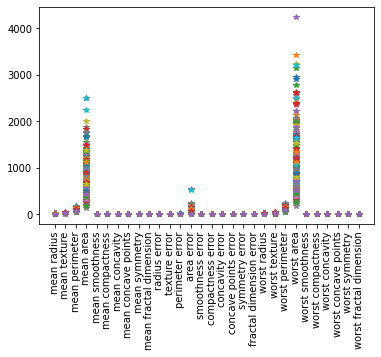

In [ ]:
plt.plot(X_train.T, "*")
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
X_train_binarised = X_train.apply(pd.cut, bins = 2, labels = [1,0])

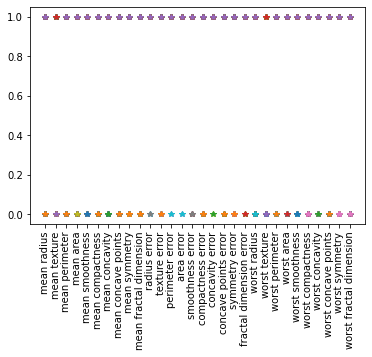

In [ ]:
plt.plot(X_train_binarised.T, "*")
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
X_test_binarised = X_test.apply(pd.cut, bins = 2, labels = [1,0])

In [ ]:
X_train_binarised = X_train_binarised.values
X_test_binarised = X_test_binarised.values

# MPNeuron

In [ ]:
for b in range(X_train_binarised.shape[1]+1):
    Y_pred_train = []
    accurate_rows = 0

    for x,y in zip(X_train_binarised, Y_train):
        Y_pred = (np.sum(x) >= b)
        Y_pred_train.append(Y_pred)
        accurate_rows += (y == Y_pred)

    print(b , accurate_rows/X_train_binarised.shape[0])

0 0.6263736263736264
1 0.6263736263736264
2 0.6263736263736264
3 0.6263736263736264
4 0.6263736263736264
5 0.6263736263736264
6 0.6263736263736264
7 0.6263736263736264
8 0.6263736263736264
9 0.6263736263736264
10 0.6263736263736264
11 0.6263736263736264
12 0.6263736263736264
13 0.6285714285714286
14 0.6307692307692307
15 0.6373626373626373
16 0.6417582417582418
17 0.6505494505494506
18 0.6593406593406593
19 0.6637362637362637
20 0.6681318681318681
21 0.6945054945054945
22 0.7142857142857143
23 0.7406593406593407
24 0.7758241758241758
25 0.8
26 0.8131868131868132
27 0.832967032967033
28 0.8417582417582418
29 0.810989010989011
30 0.7406593406593407


In [ ]:
from sklearn.metrics import accuracy_score

b = 27

Y_pred_test = []
for x in X_test_binarised:
    Y_pred = (np.sum(x) >= b)
    Y_pred_test.append(Y_pred)

accuracy = accuracy_score(Y_pred_test, Y_test)

print(b , accuracy)

27 0.8508771929824561


# MPNeuron using Class

In [ ]:
class MPNeuron:
    def __init__(self):
        self.b = None

    def model(self, x):
        return (sum(x) >= self.b)

    def predict(self, X):
        Y = []
        for x in X:
            result = self.model(x)
            Y.append(result)
        return np.array(Y)

    def fit(self, X, Y):
        accuracy = {}
        for b in range(X.shape[1]+1):
            self.b = b
            Y_pred = self.predict(X) 
            accuracy[b] = accuracy_score(Y_pred,Y)
        
        best_b = max(accuracy, key = accuracy.get)
        self.b = best_b

        print("Optimal value of b is ", best_b)
        print("Highest accuracy is ", accuracy[best_b])


In [ ]:
mp_neuron = MPNeuron()
mp_neuron.fit(X_train_binarised, Y_train)

Optimal value of b is  28
Highest accuracy is  0.8417582417582418


In [ ]:
X_train_binarised.shape

(455, 30)

In [ ]:
Y_test_pred = mp_neuron.predict(X_test_binarised)
accuracy_test = accuracy_score(Y_test_pred, Y_test)
print(accuracy_test)

0.8157894736842105


# Perceptron

$y = 1, \mbox{if} \sum_i w_i x_i >= b$

$y = 0, \mbox{otherwise}$

In [ ]:
class Perceptron:

    def __init__(self):
        self.w = None
        self.b = None

    def model(self, x):
        return 1 if (np.dot(self.w, x.astype(float)) >= self.b) else 0

    def predict(self, X):
        Y = []
        for x in X:
            result = self.model(x)
            Y.append(result)

        return np.array(Y)

    def fit(self, X,Y):
        self.w = np.ones(X.shape[1])
        self.b = 0
        for x,y in zip(X,Y):
            y_pred = self.model(x)
            if y == 1 and y_pred == 0:
                self.w += x
                self.b += 1
            elif y == 0 and y_pred == 1:
                self.w -= x
                self.b -= 1

In [ ]:
perceptron = Perceptron()

In [ ]:
x_train = X_train.values
x_test = X_test.values

In [ ]:
perceptron.fit(x_train, Y_train)

In [ ]:
Y_pred_test = perceptron.predict(x_test)
print(accuracy_score(Y_pred_test, Y_test))

0.9035087719298246


# Perceptron with Epochs

In [ ]:
class Perceptron:

    def __init__(self):
        self.w = None
        self.b = None

    def model(self, x):
        return 1 if (np.dot(self.w, x.astype(float)) >= self.b) else 0

    def predict(self, X):
        Y = []
        for x in X:
            result = self.model(x)
            Y.append(result)

        return np.array(Y)

    def fit(self, X,Y, epochs = 5, lr = 1):
        self.w = np.ones(X.shape[1])
        self.b = 0

        accuracy = {}
        max_accuracy = 0

        wt_matrix = []

        for i in range(epochs):
            for x,y in zip(X,Y):
                y_pred = self.model(x)
                if y == 1 and y_pred == 0:
                    self.w += lr * x
                    self.b += lr * 1
                elif y == 0 and y_pred == 1:
                    self.w -= lr * x
                    self.b -= lr * 1

            wt_matrix.append(self.w)

            accuracy[i] = accuracy_score(self.predict(X),Y)
            if accuracy[i] > max_accuracy:
                max_accuracy = accuracy[i]
                chkptw = self.w
                chkptb = self.b
        self.w = chkptw
        self.b = chkptb
        print(max_accuracy)
        plt.plot(np.array(list(accuracy.values())))
        plt.ylim([0,1])
        plt.show()

        return np.array(wt_matrix)

In [ ]:
perceptron = Perceptron()

0.9186813186813186


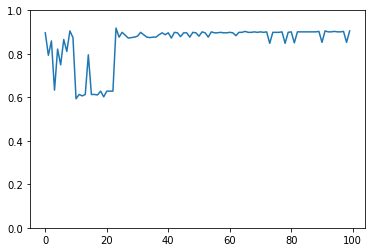

In [ ]:
wt_matrix = perceptron.fit(x_train, Y_train, 100, 0.01)

In [ ]:
Y_pred_test = perceptron.predict(x_test)
print(accuracy_score(Y_pred_test, Y_test))

0.9210526315789473


# Animating Weights

In [ ]:
%matplotlib inline

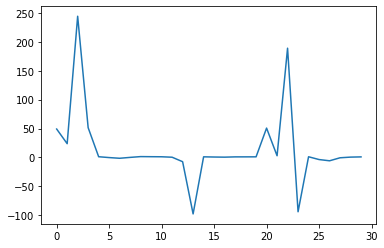

In [ ]:
plt.plot(wt_matrix[-1,:])
plt.show()

In [ ]:
from matplotlib import animation, rc
from IPython.display import HTML

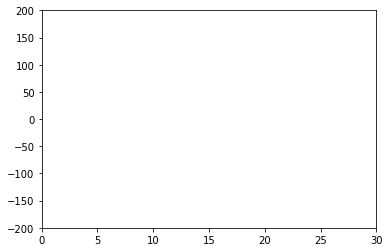

In [ ]:
# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()
ax.set_xlim(( 0, wt_matrix.shape[1]))
ax.set_ylim((-200,200))

line, = ax.plot([], [], lw=2)

In [ ]:
# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return (line,)

In [ ]:
# animation function. This is called sequentially
def animate(i):
    x = list(range(wt_matrix.shape[1]))
    y = wt_matrix[i,:]
    line.set_data(x, y)
    return (line,)

In [ ]:
# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, frames=100, interval=200, blit=True)

In [ ]:
HTML(anim.to_html5_video())